In [2]:
# importing the dataset
from google.colab import files
df = files.upload()

Saving house_price_dataset.csv to house_price_dataset.csv


In [10]:
# Reading csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('house_price_dataset.csv')

# df_x = df['House_Size_SqFt']
# df_y = df['House_Price_USD']

X = df[["Size_of_House", "Num_Floors", "Num_Bedrooms", "Age_of_Home"]].to_numpy()
Y = df["Price"].to_numpy()

# Feature Scaling using z-index
m,n = np.shape(X)
feature_means = np.mean(X, axis=0)
feature_standard_deviations = np.std(X, axis=0)
X_normalized = (X - feature_means) / feature_standard_deviations
print(X_normalized)






[[-0.96255663 -1.18877425  0.07630981  1.64182571]
 [ 1.48071048  0.0242607   0.07630981  0.2037814 ]
 [ 0.91016734 -1.18877425  0.77003534  0.34407841]
 [-1.29313603  1.23729565  0.77003534  0.65974667]
 [ 1.20550732  1.23729565 -1.31114125 -0.07681261]
 [ 0.97645103 -1.18877425 -1.31114125 -0.84844614]
 [ 0.76501445  1.23729565 -0.61741572 -0.56785213]
 [-1.57505147  1.23729565 -1.31114125 -0.04173836]
 [-0.27035355 -1.18877425  0.07630981  1.32615744]
 [-1.03890872 -1.18877425  0.77003534 -0.88352039]
 [ 0.32200448  1.23729565 -1.31114125  0.62467242]
 [ 0.35724391  1.23729565 -1.31114125 -0.74322339]
 [-0.6907096   1.23729565 -0.61741572 -1.62007967]
 [ 1.15600431  0.0242607  -0.61741572  1.46645445]
 [ 1.77017723  0.0242607   0.07630981 -1.0939659 ]
 [ 0.75242894  0.0242607   0.77003534 -0.53277788]
 [-1.28642376 -1.18877425 -0.61741572 -1.37455991]
 [-0.77629107  0.0242607  -1.31114125 -0.18203536]
 [ 0.46212317 -1.18877425  0.77003534 -0.00666411]
 [ 0.03337677 -1.18877425  0.77

In [ ]:
# Computing Cost function

def compute_cost(w, b, x, y):
  m = np.shape(x)[0]
  cost = 0
  for i in range(m):
    f_wb = np.dot(w, x[i]) + b
    cost_temp = f_wb - y[i]
    cost = cost + cost_temp
  cost = cost + (1 / 2 * m)
  return cost

In [14]:
# Computing derivative of cost function

def compute_gradient(x, y, w, b):
  m, n = np.shape(x)

  dj_dw = np.zeros(n)
  dj_db = 0
  for i in range(m):
    error = (np.dot(x[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + error * x[i, j]
    dj_db = dj_db + error
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db


In [15]:
# Computing gradient descent

def gradient_descent(x, y, w, b, alpha, iters):
  m, n =  np.shape(x)
  print(m, n)
  for i in range(iters):
    dj_dw, dj_db = compute_gradient(x, y, w ,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

  return w, b

In [19]:
m,n = np.shape(X_normalized)
w_in = np.zeros(n)
b_in = 0
w, b = gradient_descent(X_normalized, Y, w_in, b_in, 0.01, 1000)

100 4


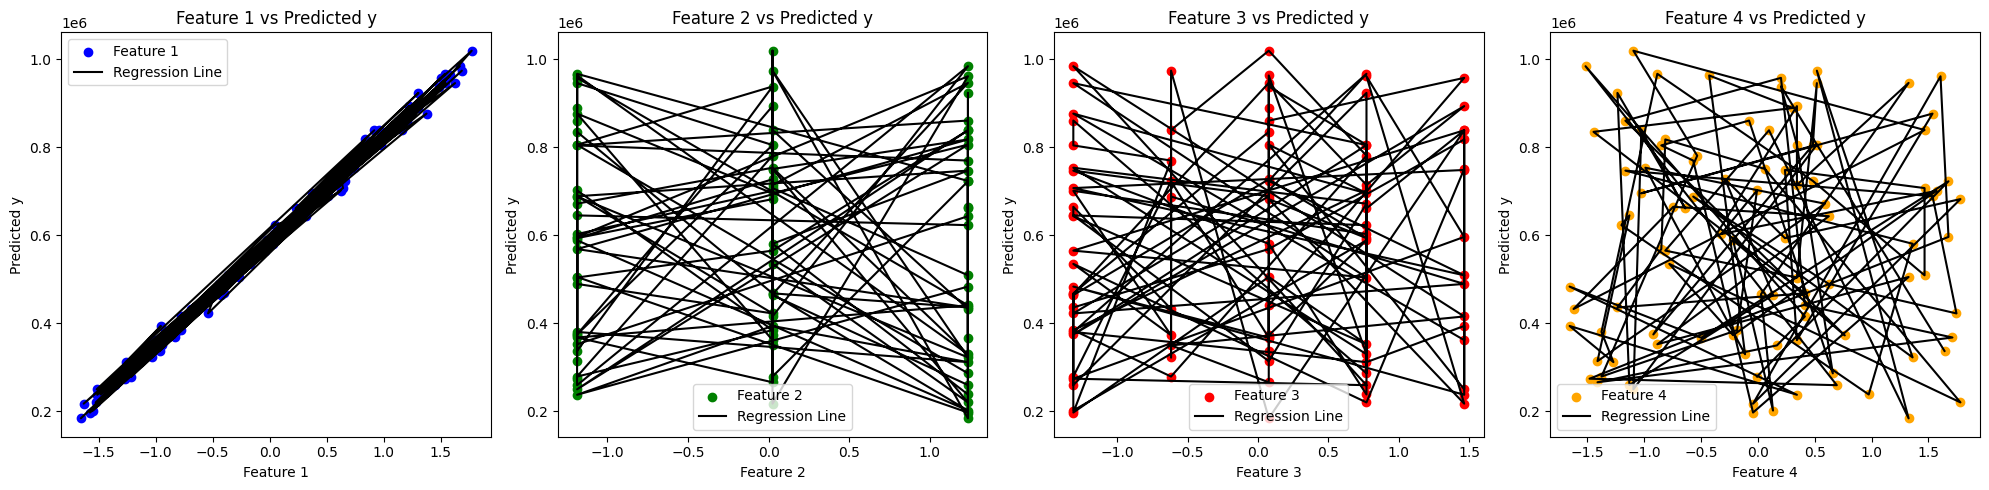

In [21]:
y_line = np.dot(X_normalized, w) + b
colors = ['blue', 'green', 'red', 'orange']

fig, axs = plt.subplots(1, X_normalized.shape[1], figsize=(20, 5))

for i in range(X_normalized.shape[1]):
    # Plot the data points for feature i
    axs[i].scatter(X_normalized[:, i], y_line, color=colors[i], label=f'Feature {i+1}')

    # Plot the line for feature i (in this case, it's just the linear relationship)
    axs[i].plot(X_normalized[:, i], y_line, color='black', label='Regression Line')

    # Set the title and labels
    axs[i].set_title(f'Feature {i+1} vs Predicted y')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Predicted y')
    axs[i].legend()

plt.tight_layout()
plt.show()